In [1]:
import matplotlib.pyplot as plt            
from tabulate import tabulate              
import matplotlib as mat                    
import seaborn as sns                     
import pandas as pd                        
import numpy as np                 
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.4.4
Seaborn version:  0.11.2
Matplotlib version:  3.5.2


## Reading the file 

In [3]:
df=pd.read_csv('DS1_C6_S3_BazilHousing_Data_Hackathon.csv')

## Reading the top 5 rows 

In [4]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Reading the bottom 5 rows

In [5]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


##  Number of rows and columns 

In [6]:
df.shape

(10692, 13)

## Display the names of all the columns

In [7]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

## Displaying the dataset information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


## Checking if there are null values in any columns

In [9]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

## Separating Categorical and Numerical Variables

In [10]:
def separate_data_types(df):
    categorical=[]
    continuous=[]
    for col in df.columns:
        if df[col].nunique()<30:
            categorical.append(col)
        else:
            continuous.append(col)
    return categorical,continuous

categorical,continuous=separate_data_types(df)

from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"Categorical":categorical,"Continuous":continuous},headers=["Categorical","Continuous"]))

Categorical     Continuous
--------------  -------------------
city            area
rooms           floor
bathroom        hoa (R$)
parking spaces  rent amount (R$)
animal          property tax (R$)
furniture       fire insurance (R$)
                total (R$)



# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

### User defined function for level 1 analysis of categorical columns
This function will check for the following \
Unique values \
Mode \
Total count of missing values 

In [11]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}") 
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}")      

In [13]:
for i in categorical:
    info_of_cat(i)
    print('-------------------------------------------------------')

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0
-------------------------------------------------------
Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0
-------------------------------------------------------
Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0
-------------------------------------------------------
Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0
-------------------------------------------------------
Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0
-------------------------------------------------------
Unique values in furniture are: ['furnished'

## 1. Analysis of City


### city is nominal data type

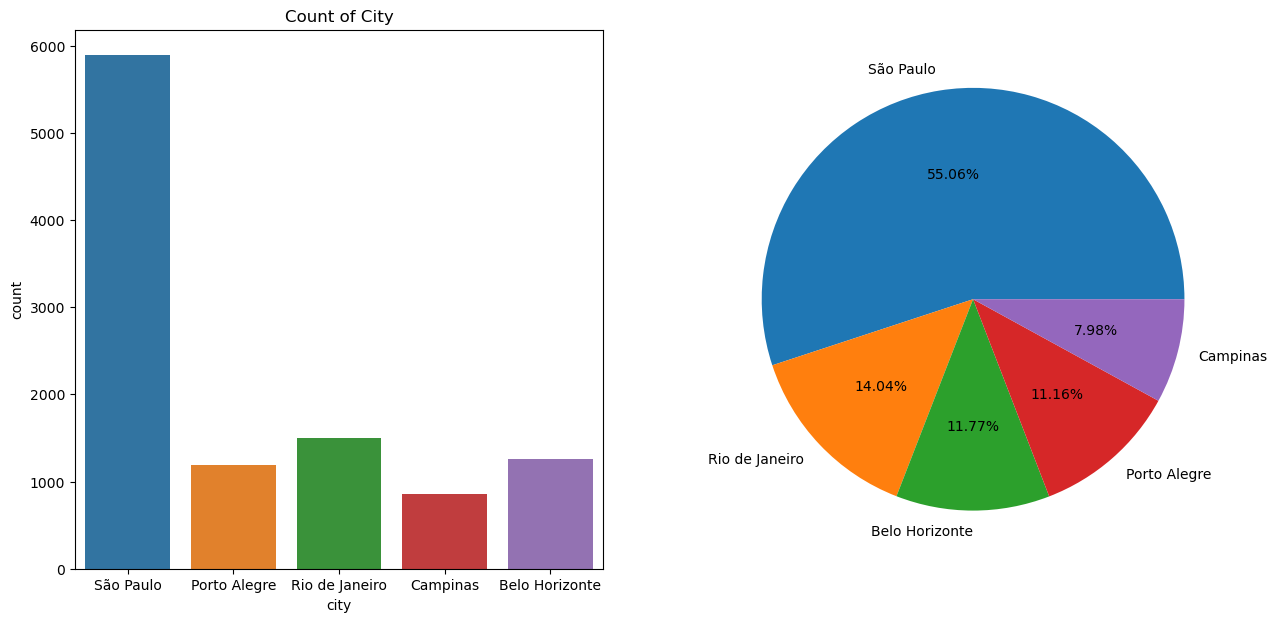

In [14]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Count of City')
percentage=df["city"].value_counts()  
labels=list(df["city"].value_counts().index)
sns.countplot(x = df["city"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

### ***Interpretation : 55% of homes data are from Sao Paulo City

## 2. Analysis of Rooms

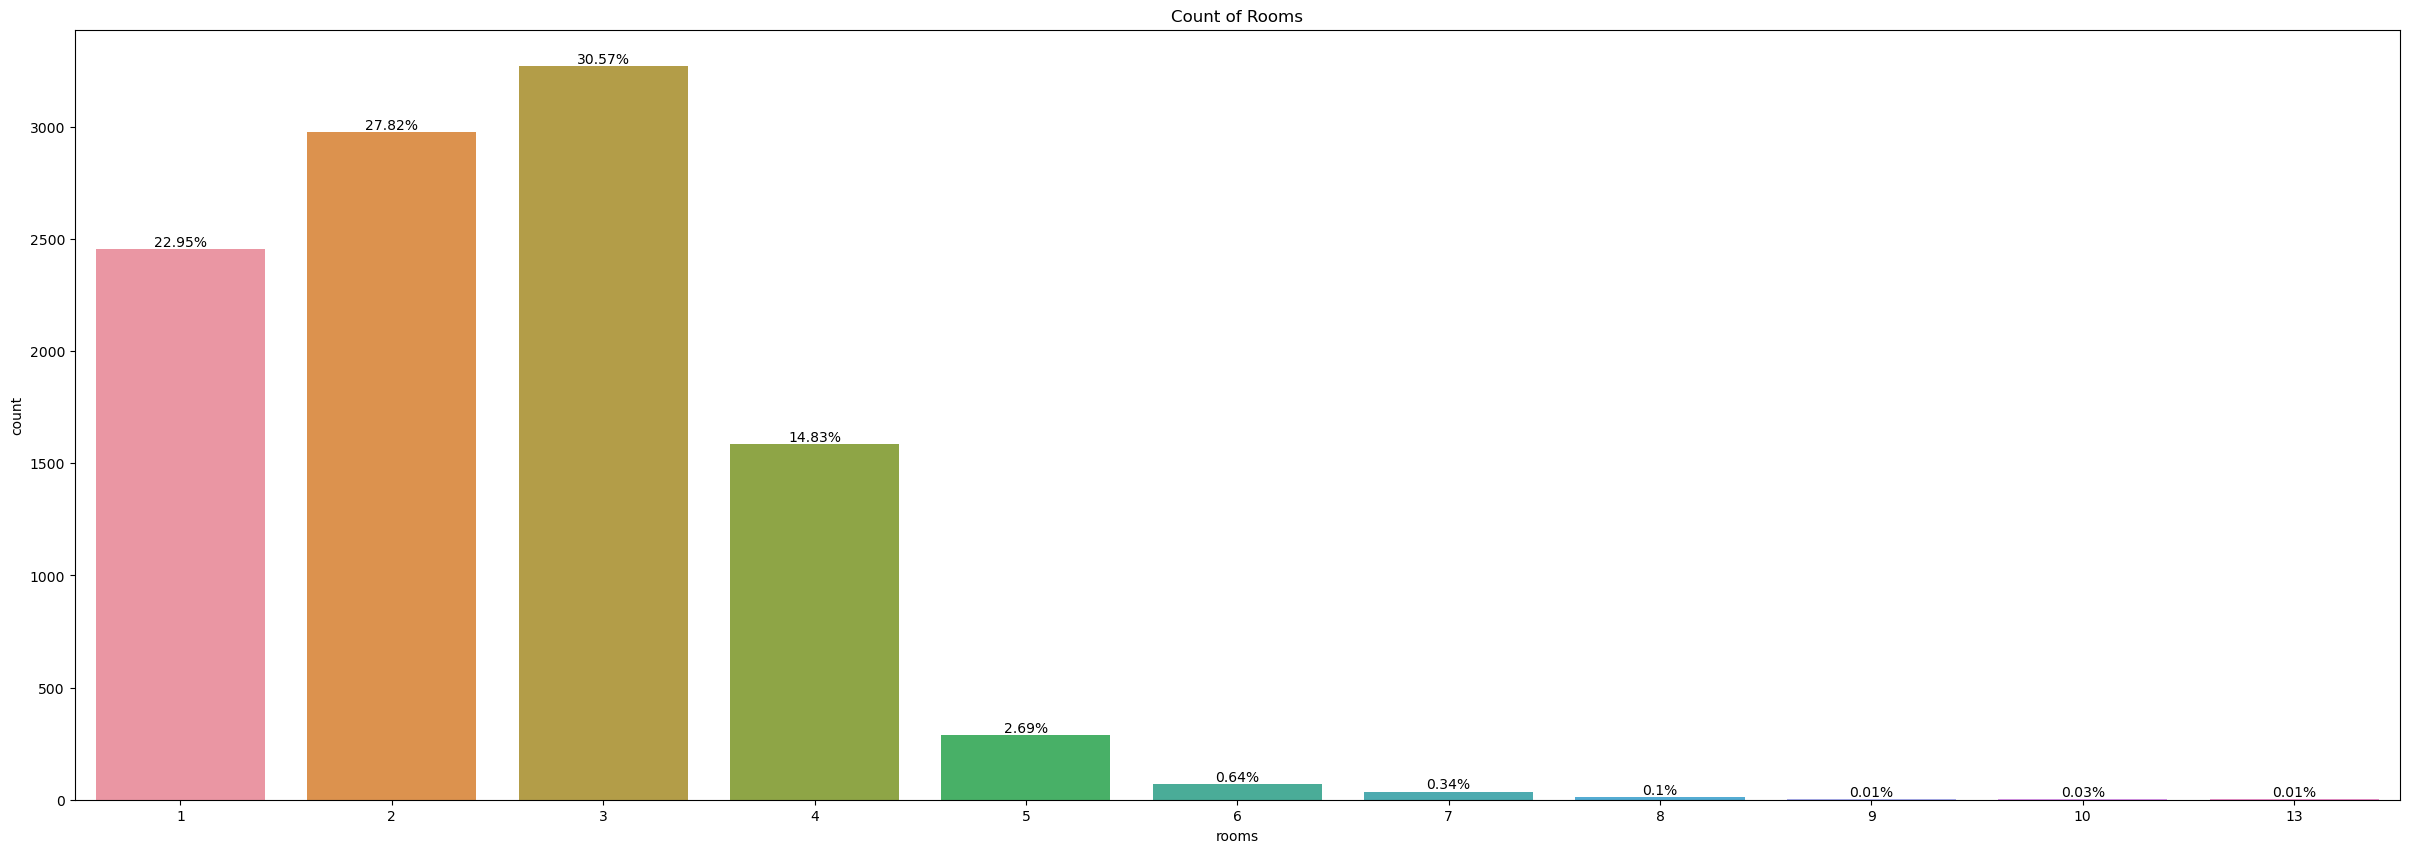

In [15]:
fig,ax=plt.subplots(figsize=(15,7))
ax.set_title('Count of Rooms')
ax=sns.countplot(x = df["rooms"])
for bar in ax.patches:                                             
    percentage = f"{round(bar.get_height()*100/len(df), 2)}%"          
                                                                   
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)
plt.show()

### ***Interpretation : Rooms is a ordinal datatype. 31% of homes are having 3 rooms

## 3. Analysis of Bathroom

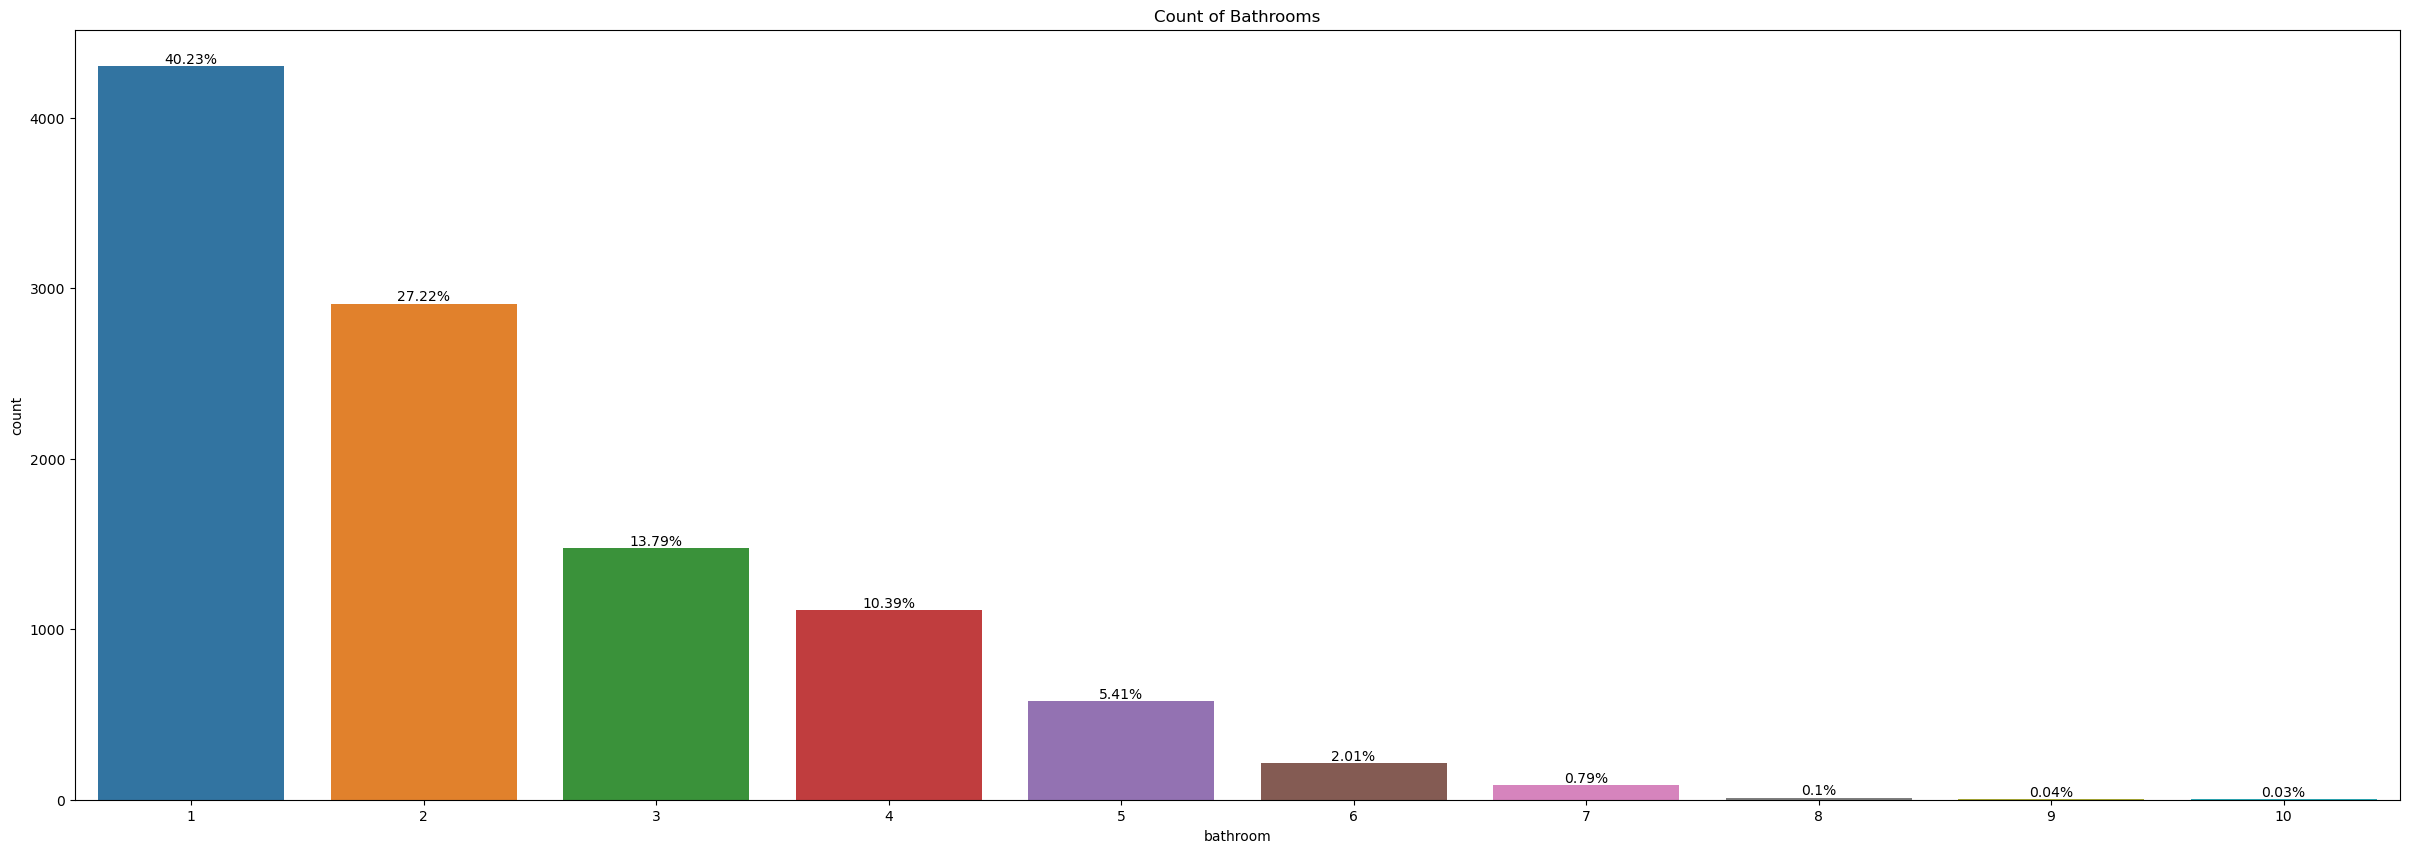

In [16]:
fig,ax=plt.subplots(figsize=(15,7))
ax.set_title('Count of Bathrooms')
ax=sns.countplot(x = df["bathroom"])
for bar in ax.patches:                                             
    percentage = f"{round(bar.get_height()*100/len(df), 2)}%"          
                                                                   
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)
plt.show()

### ***Interpretation : Bathroom is a ordinal datatype. 40% of homes are having single bathroom

## 4. Analysis of Parking Places

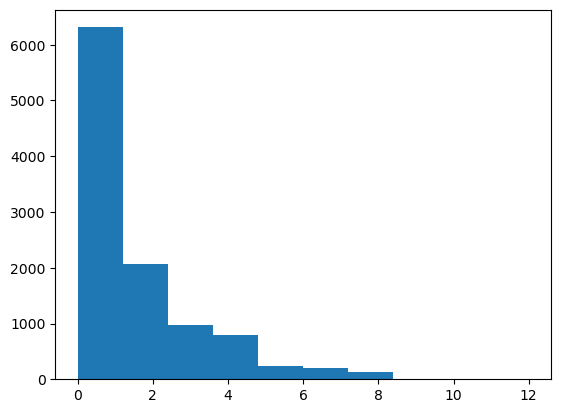

In [17]:
percentage=df["parking spaces"].value_counts()  
labels=list(df["parking spaces"].value_counts().index)

plt.hist(df["parking spaces"])
plt.show()

## 5. Analysis of Animals

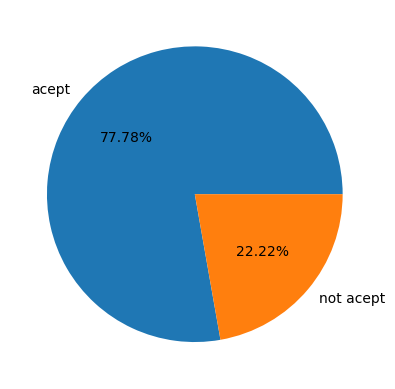

In [18]:
percentage=df["animal"].value_counts()  
labels=list(df["animal"].value_counts().index)
plt.pie(percentage,labels = labels, autopct= "%0.2f%%");

### ***Interpretation : Animal is a nominal datatype. 78% of homes are allowing pets

# 6. Analysis of Furniture

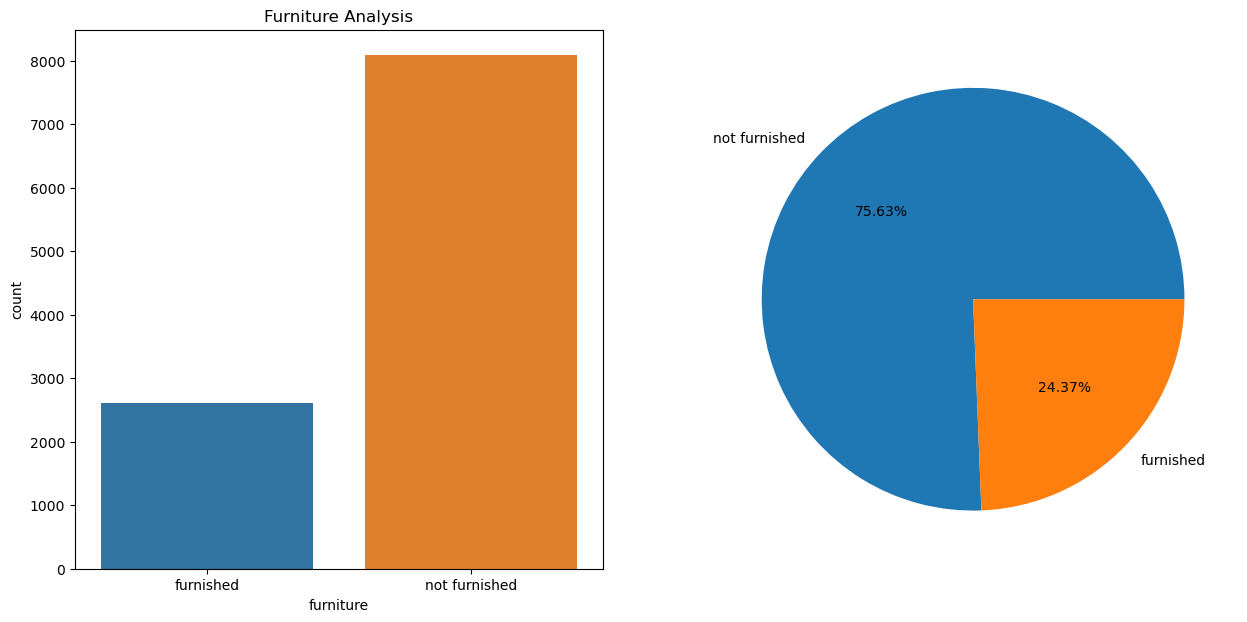

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Furniture Analysis')
percentage=df["furniture"].value_counts()  
labels=list(df["furniture"].value_counts().index)
sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")
plt.show()

### ***Interpretation : Furnture is a nominal datatype. 75% of homes are Non-Furnished

#  $$\;\;\;\; Univariate \ Analysis \ of \ Continuous \ Variables$$

# User defined function for calculating mean, median, standard deviation, and count of all the continuous variables 

In [20]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")
    print(df[col].describe())

In [21]:
for i in continuous:
    info_of_numerical(i)
    print('----------------------------------------------------')

The mean of the area is 149.21791994014217
The median of the area is 90.0
The standard deviation of the area is 537.0169423364867
Number of missing values in the area is 0
count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64
----------------------------------------------------
The mean of the floor is 5.0679947624392065
The median of the floor is 3.0
The standard deviation of the floor is 6.069050243218268
Number of missing values in the floor is 0
count    10692.000000
mean         5.067995
std          6.069050
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        301.000000
Name: floor, dtype: float64
----------------------------------------------------
The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The standard deviation of the hoa (R$) is 15592.305248403

In [22]:
#Missing Value Treatment

print(continuous)

for i in continuous:
    mean=df[i].mean()
    df[i].fillna(mean,inplace=True)
df.isnull().sum()


['area', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']


city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [23]:
#Outliers Treatment

for col in continuous:
    mean=df[col].mean()
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    LF=Q1-(1.5*IQR)
    UF=Q3+(1.5*IQR)
    
    for i in df[col]:
        if (i<LF) or (i>UF):
            df[col].replace(to_replace=i,value=mean,inplace=True)
        else:
            pass

# 1. Analysis of Area

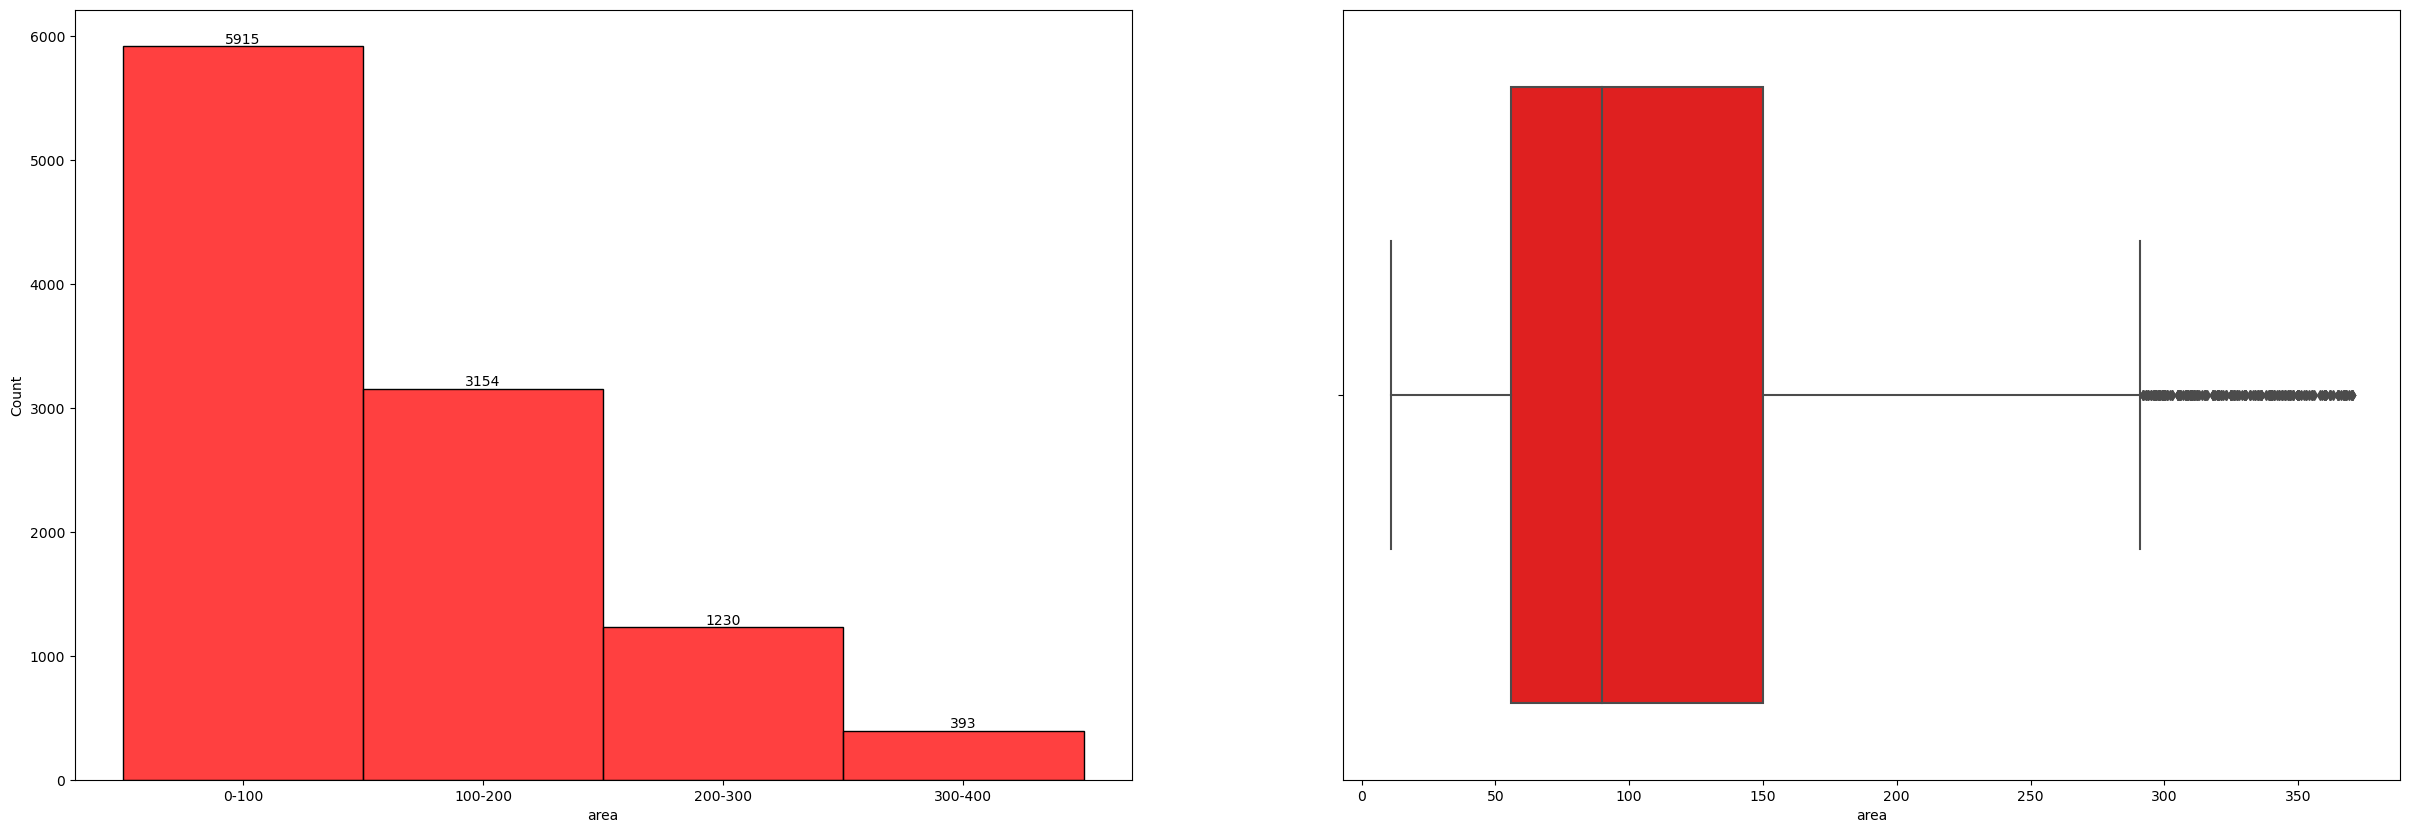

In [24]:
plt.style.use('default')
plt.rcParams.update({'text.color':'black'})

fig,ax=plt.subplots(1,2,figsize=(20,15))
bins=[0,100,200,300,400]
labels=["0-100","100-200","200-300","300-400"]
data=pd.cut(df['area'],bins=bins,labels=labels)
ax=sns.histplot(data=data,ax=ax[0],color='red')
for bar in ax.patches:
    count=bar.get_height()
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(count, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)


sns.boxplot(data=df,x='area',color='red')
    
plt.show()

In [25]:
data.value_counts()

0-100      5915
100-200    3154
200-300    1230
300-400     393
Name: area, dtype: int64

### ***Interpretation : There are 5915 rooms havig area less than 100sq.m

# 2. Analysis of Floor

In [26]:
info_of_numerical('floor')

The mean of the floor is 4.591454783875363
The median of the floor is 3.0
The standard deviation of the floor is 4.501111260252582
Number of missing values in the floor is 0
count    10692.000000
mean         4.591455
std          4.501111
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         18.000000
Name: floor, dtype: float64


In [27]:
continuous.remove('floor')  #as number of unique values are less than 30

In [28]:
categorical.append('floor')

In [29]:
info_of_cat('floor')

Unique values in floor are: [ 7.          5.06799476  6.          2.          1.          0.
  4.          3.         10.         11.          9.          8.
 17.         18.          5.         13.         15.         16.
 14.         12.        ]
Mode of floor is 0.0
Number of missing values in floor is 0


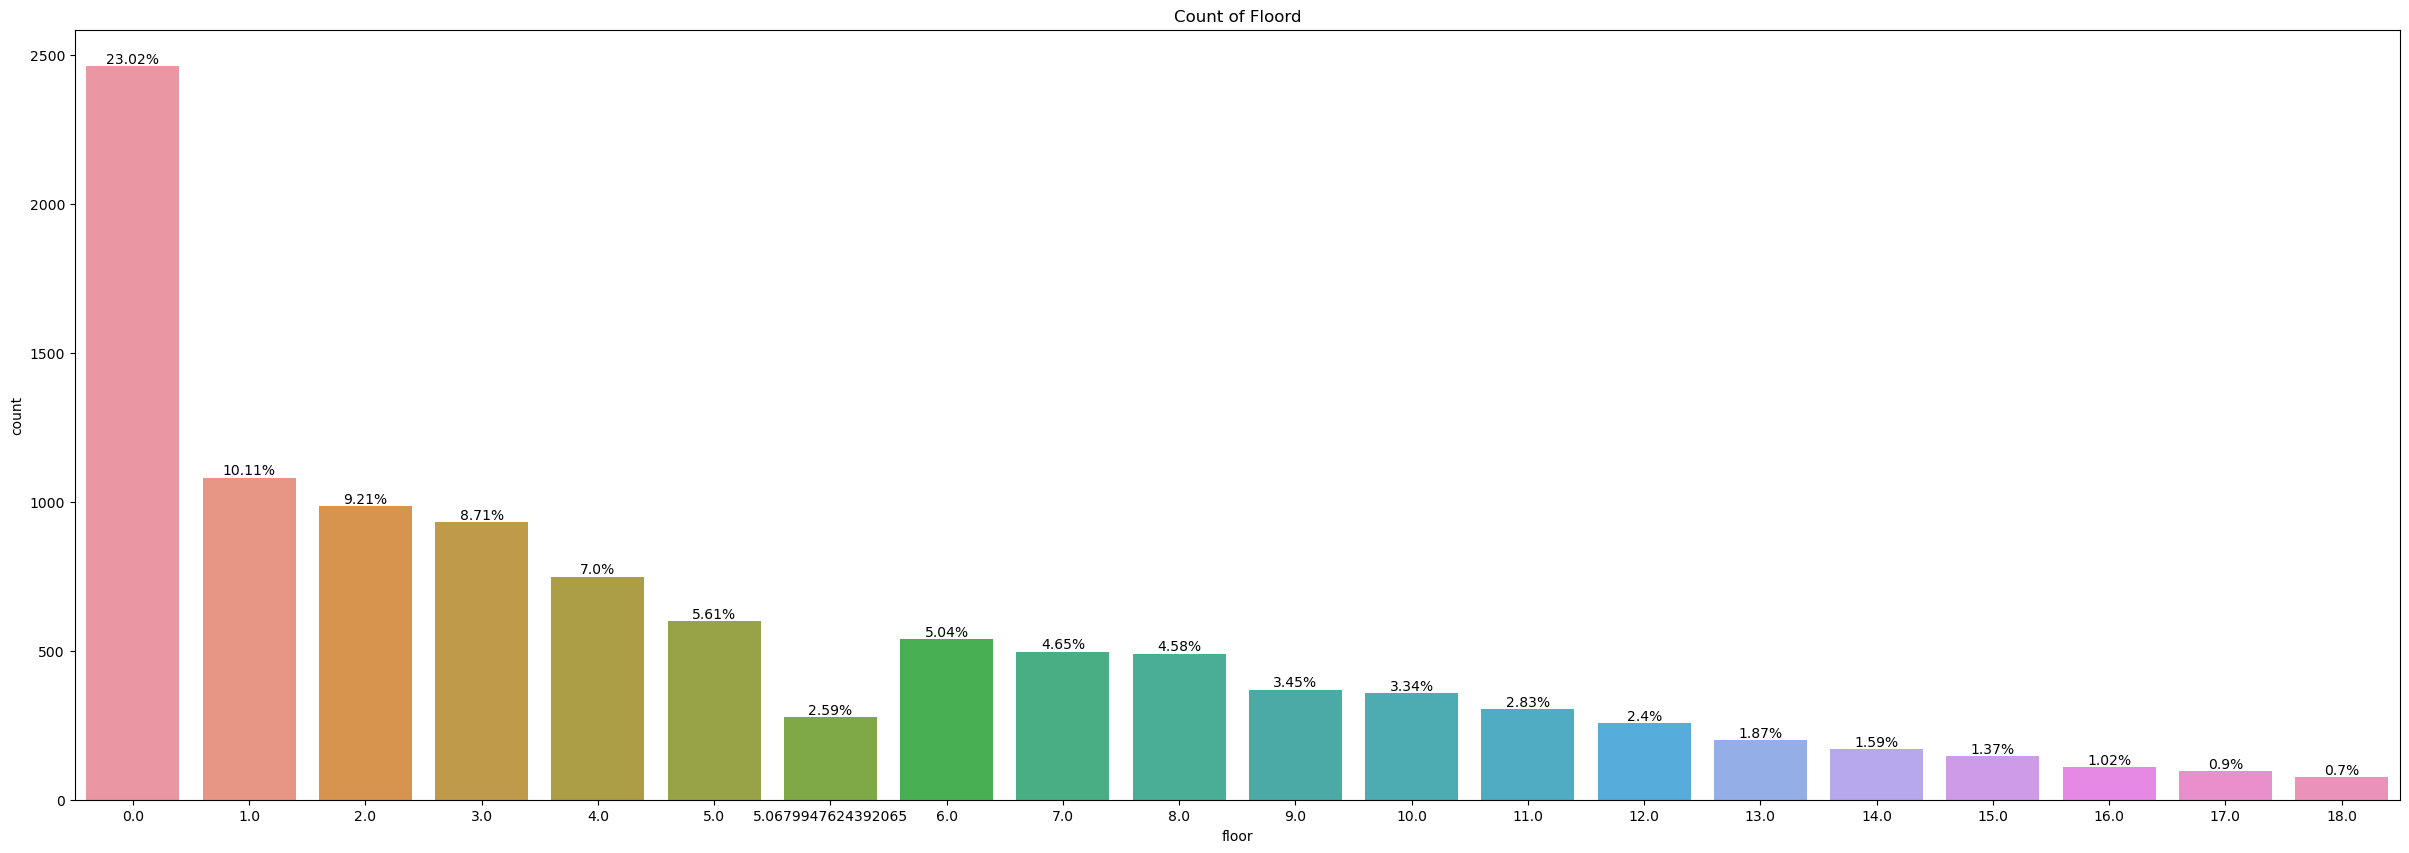

In [30]:
fig,ax=plt.subplots(figsize=(15,7))
ax.set_title('Count of Floord')
ax=sns.countplot(x = df["floor"])
for bar in ax.patches:                                             
    percentage = f"{round(bar.get_height()*100/len(df), 2)}%"          
                                                                   
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)
plt.show()

### ***Interpretation : Max ground floor rooms are available

# 3. Analysis of hoa 

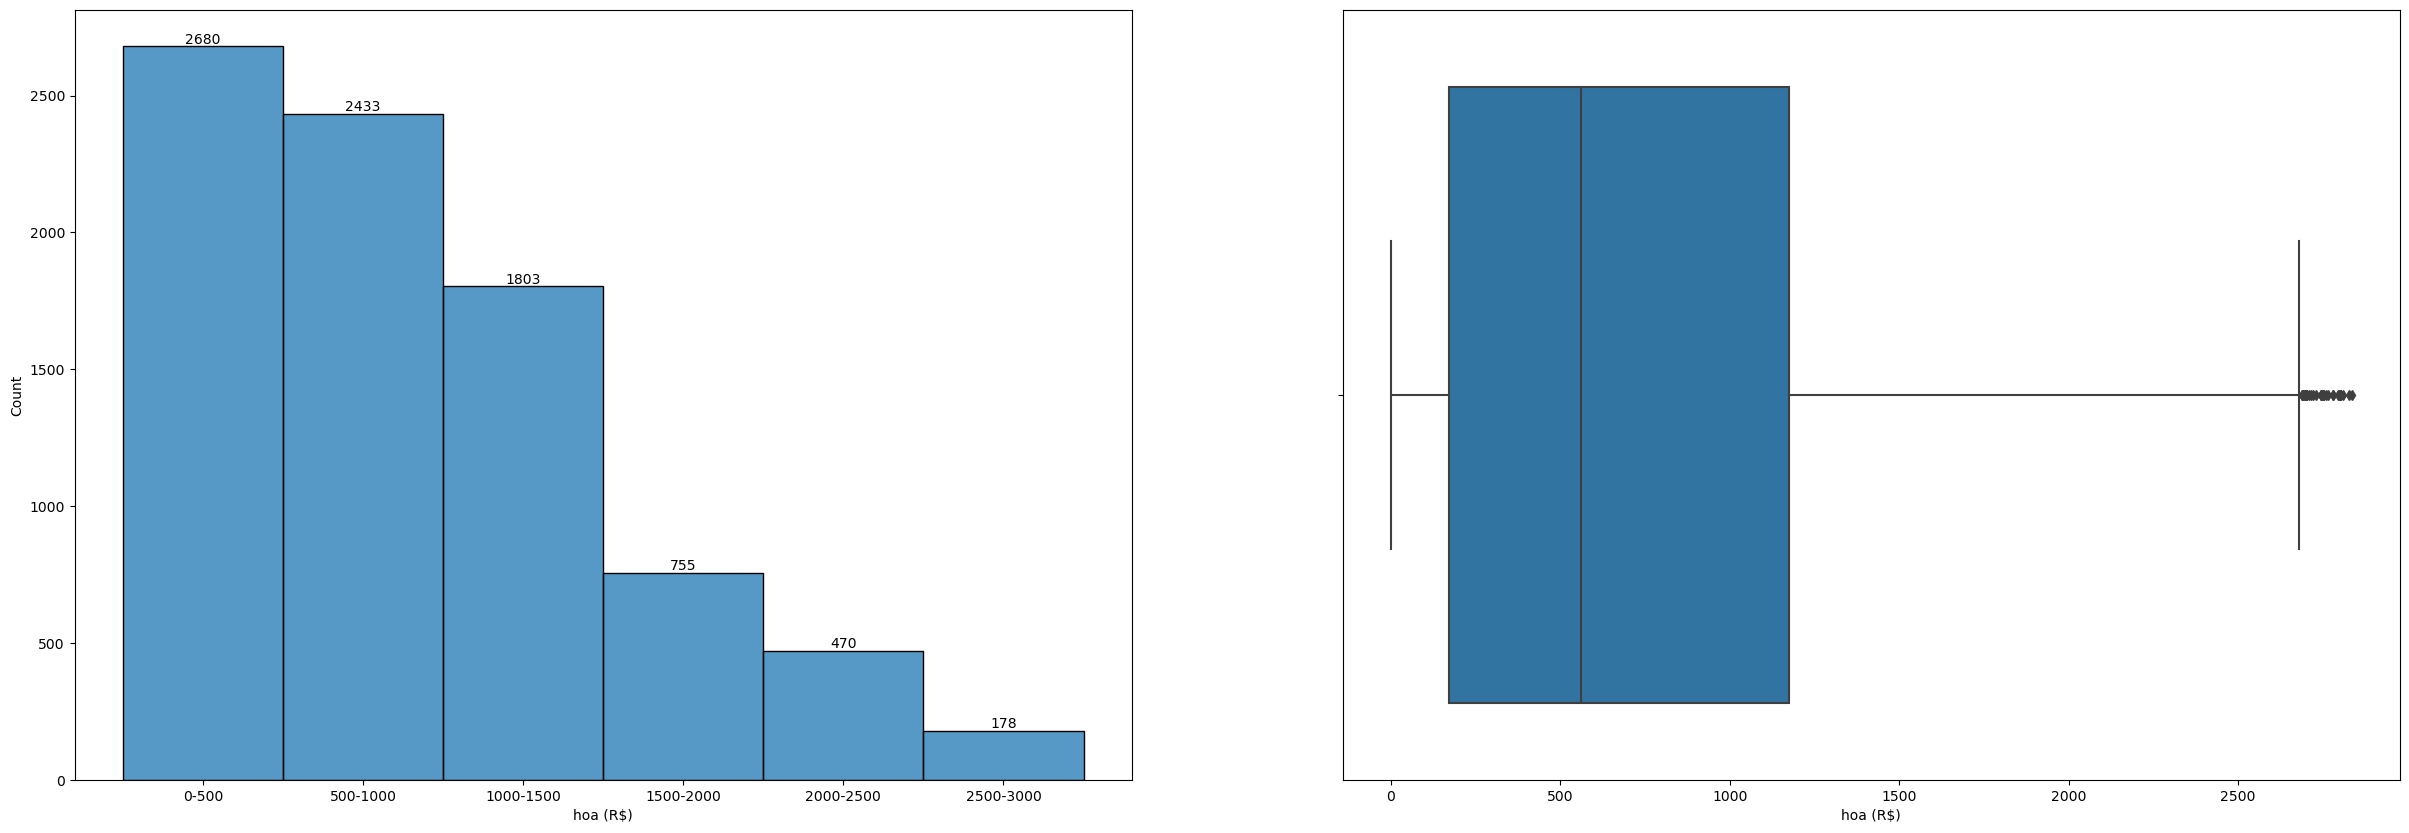

In [31]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
bins=[0,500,1000,1500,2000,2500,3000]
labels=["0-500","500-1000","1000-1500","1500-2000","2000-2500","2500-3000"]
data=pd.cut(df['hoa (R$)'],bins=bins,labels=labels)
ax=sns.histplot(data=data,ax=ax[0])
for bar in ax.patches:
    count=bar.get_height()
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(count, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)


sns.boxplot(data=df,x='hoa (R$)')
    
plt.show()

In [32]:
data.value_counts()

0-500        2680
500-1000     2433
1000-1500    1803
1500-2000     755
2000-2500     470
2500-3000     178
Name: hoa (R$), dtype: int64

### ***Interpretation : There are 2680 rooms havig hoa (RS) less than 2680

# 4. Analysis of rent amount (Rs)

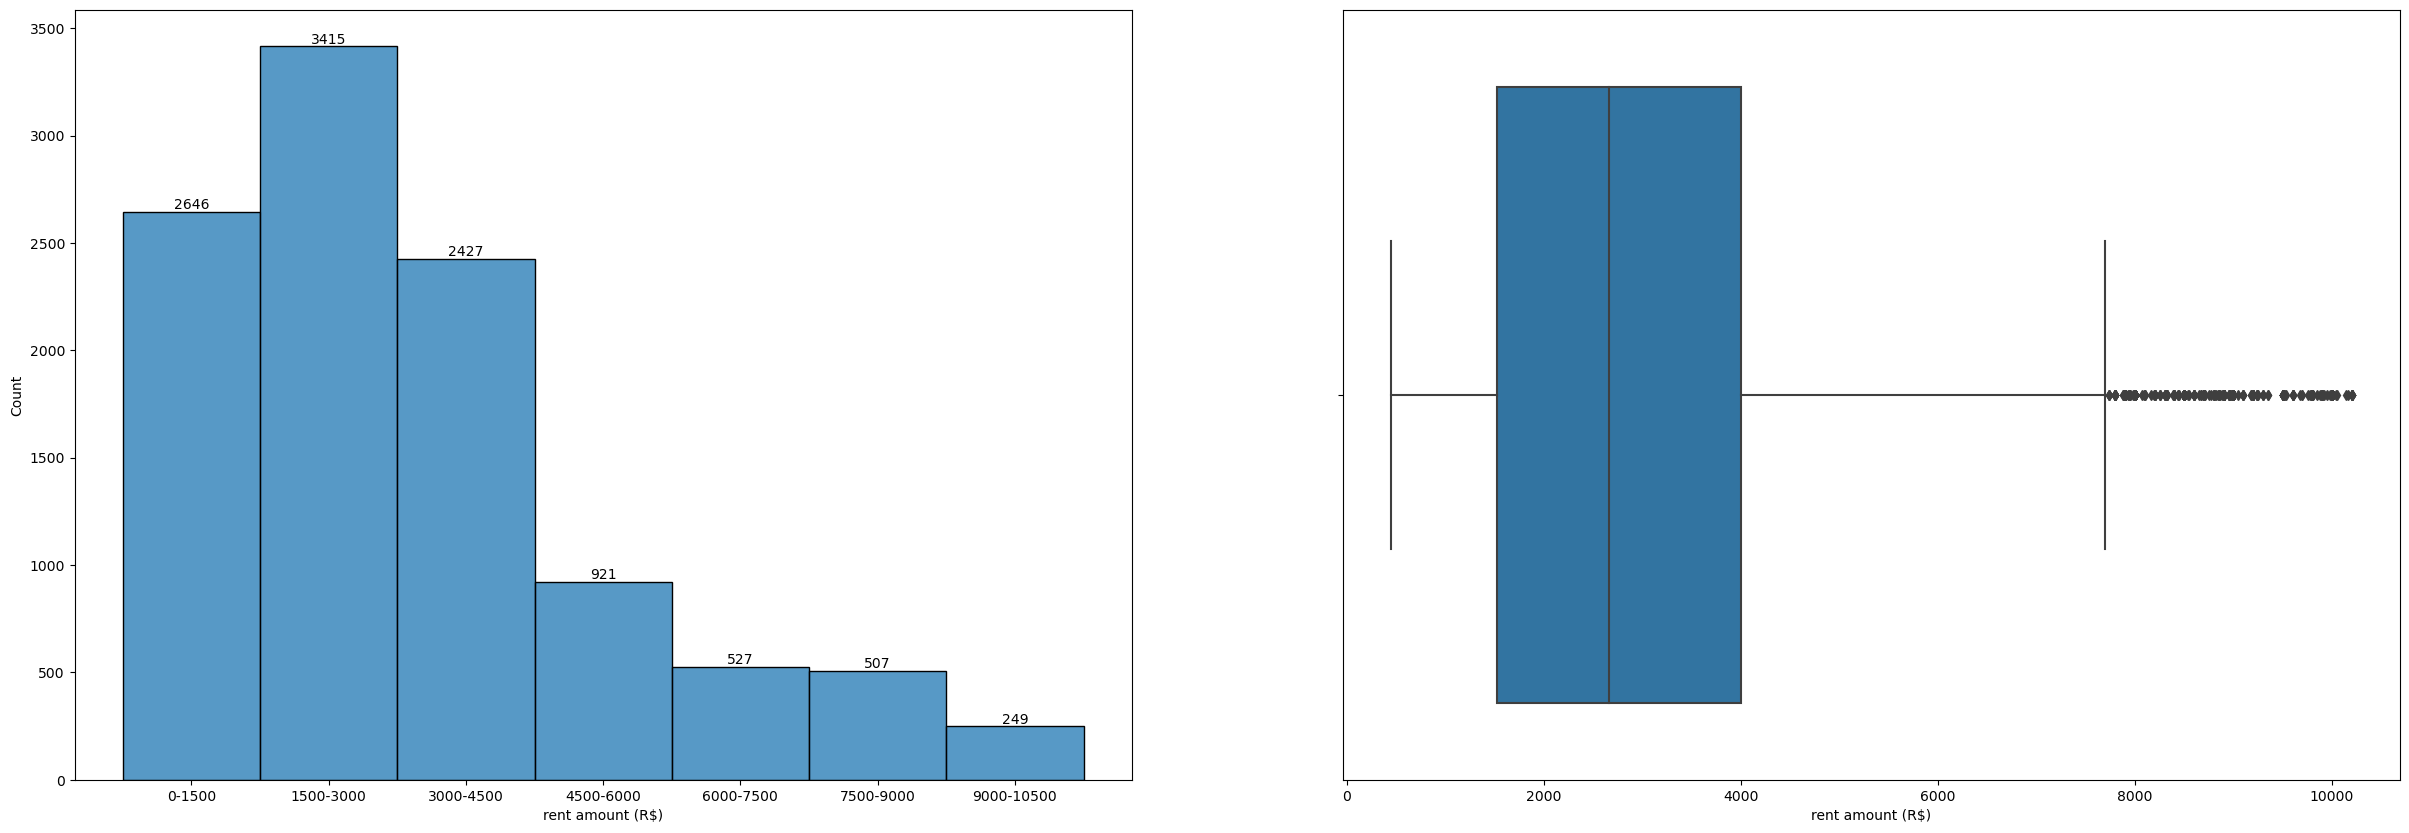

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
bins=[0,1500,3000,4500,6000,7500,9000,10500]
labels=["0-1500","1500-3000","3000-4500","4500-6000","6000-7500","7500-9000",'9000-10500']
data=pd.cut(df['rent amount (R$)'],bins=bins,labels=labels)
ax=sns.histplot(data=data,ax=ax[0])
for bar in ax.patches:
    count=bar.get_height()
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(count, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)


sns.boxplot(data=df,x='rent amount (R$)')
    
plt.show()

In [34]:
data.value_counts()

1500-3000     3415
0-1500        2646
3000-4500     2427
4500-6000      921
6000-7500      527
7500-9000      507
9000-10500     249
Name: rent amount (R$), dtype: int64

### ***Interpretation : There are 3514 rooms havig rent amount in between 1500-3000

# 5. Analysis of property tax (Rs)

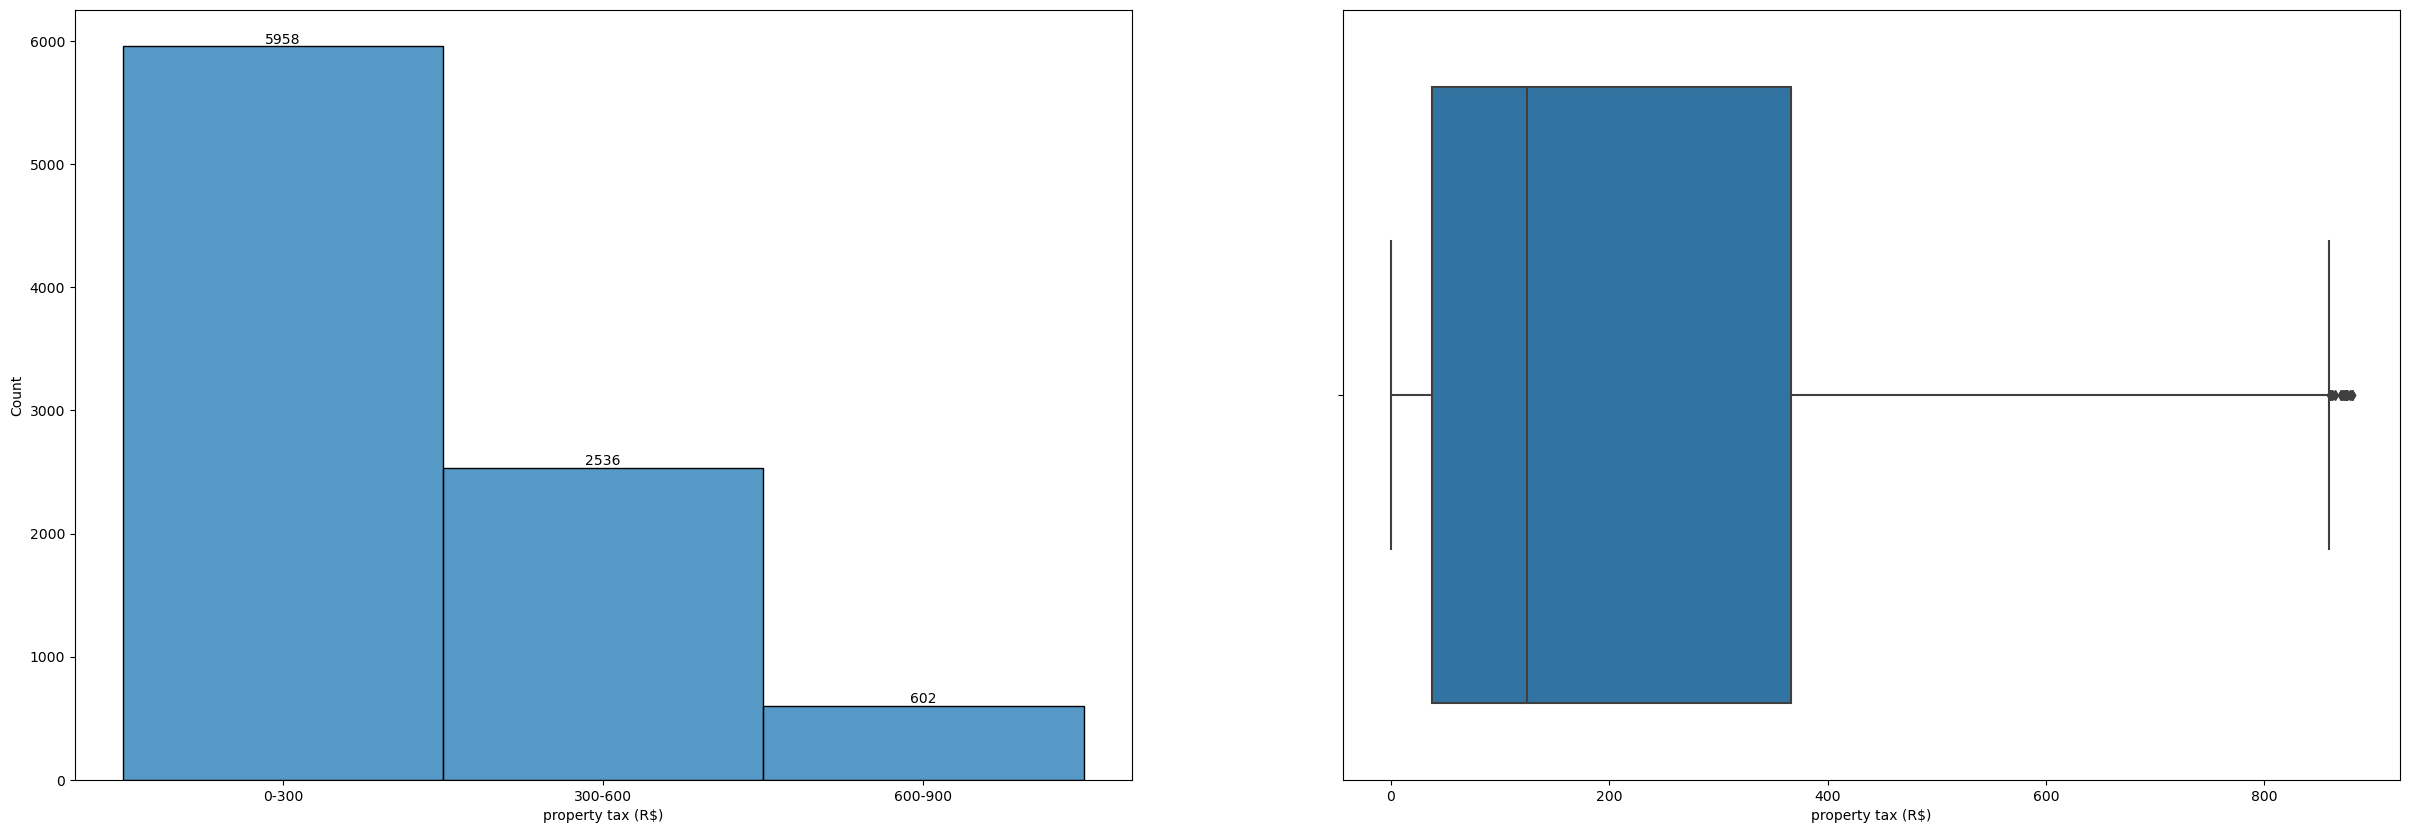

In [36]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
bins=[0,300,600,900]
labels=["0-300","300-600","600-900"]
data=pd.cut(df['property tax (R$)'],bins=bins,labels=labels)
ax=sns.histplot(data=data,ax=ax[0])
for bar in ax.patches:
    count=bar.get_height()
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(count, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)


sns.boxplot(data=df,x='property tax (R$)')
    
plt.show()

In [37]:
data.value_counts()

0-300      5958
300-600    2536
600-900     602
Name: property tax (R$), dtype: int64

### ***Interpretation : There are 5958 rooms havig rent amount in between 0-300

# 6. Analysis of fire insurance (Rs)

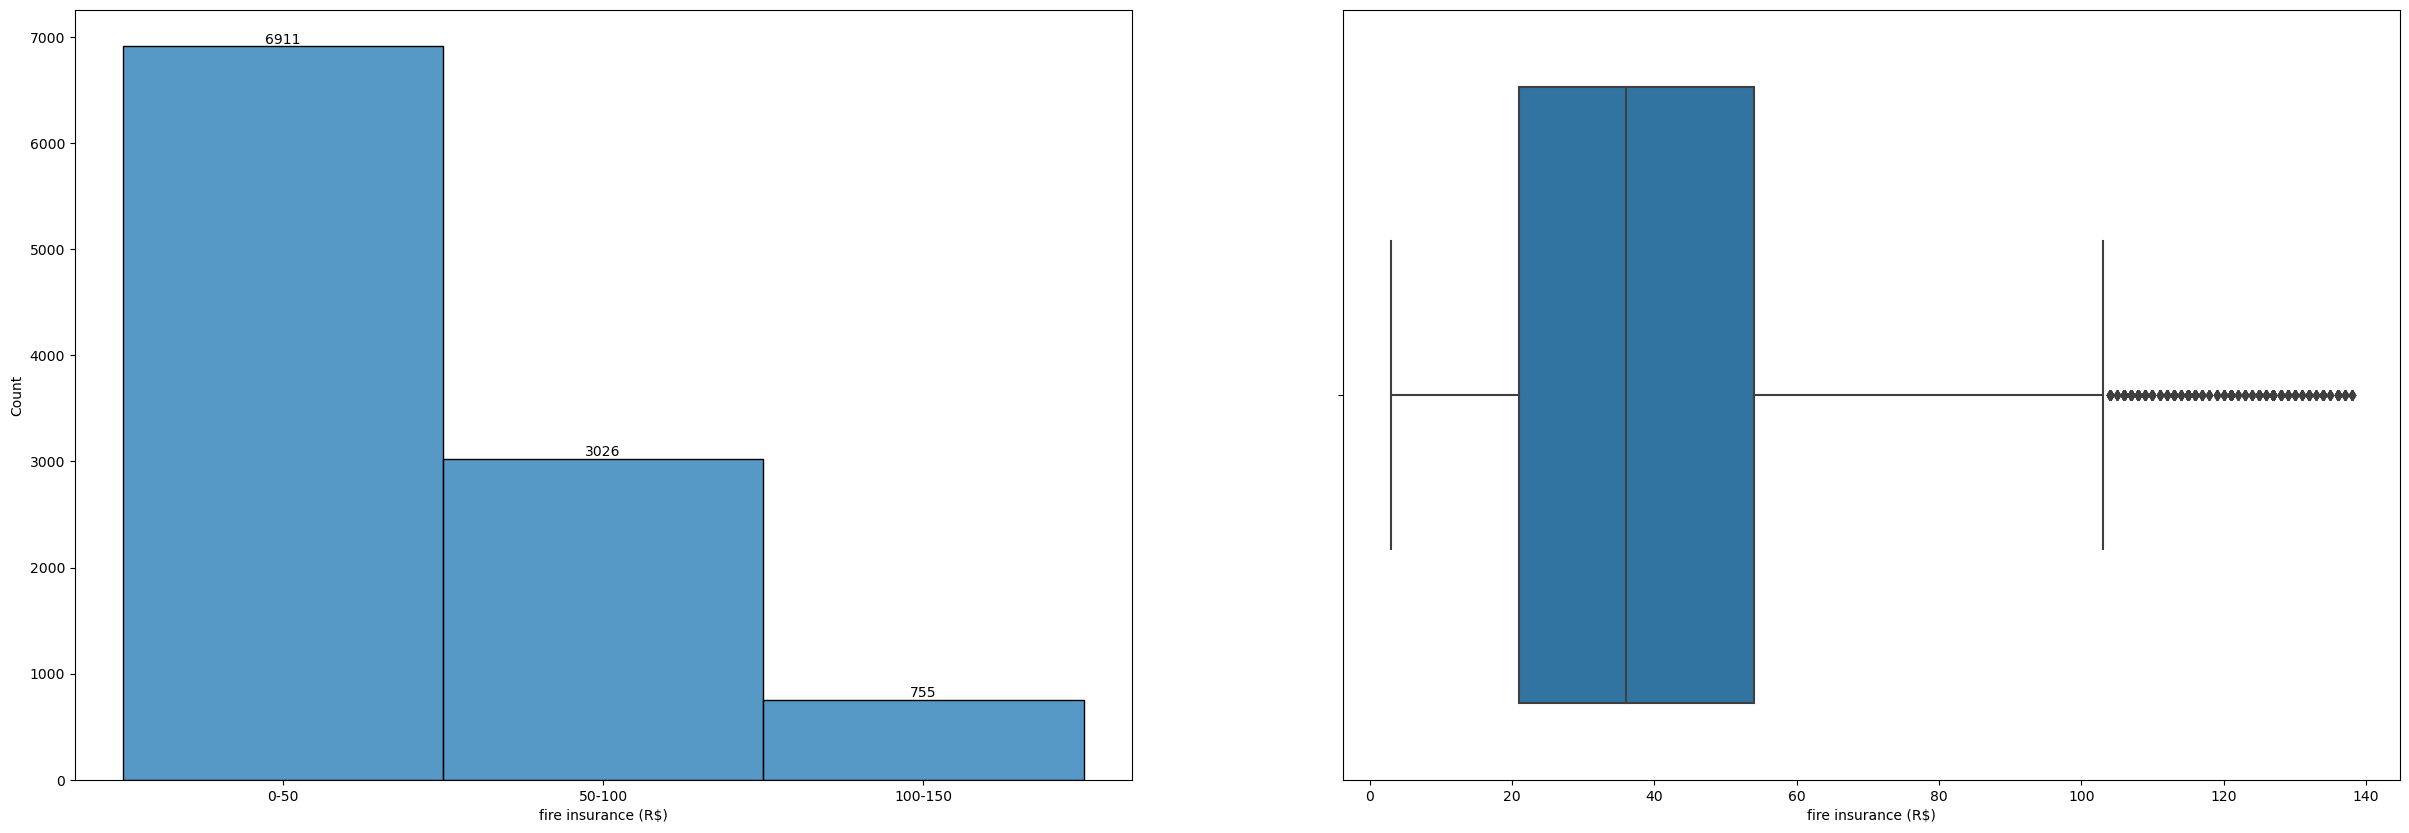

In [38]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
bins=[0,50,100,150]
labels=["0-50","50-100","100-150"]
data=pd.cut(df['fire insurance (R$)'],bins=bins,labels=labels)
ax=sns.histplot(data=data,ax=ax[0])
for bar in ax.patches:
    count=bar.get_height()
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(count, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)


sns.boxplot(data=df,x='fire insurance (R$)')
    
plt.show()

In [39]:
data.value_counts()

0-50       6911
50-100     3026
100-150     755
Name: fire insurance (R$), dtype: int64

### ***Interpretation : There are 6911 rooms havig fire insurance in between 0-50

# 7. Analysis of total (Rs)

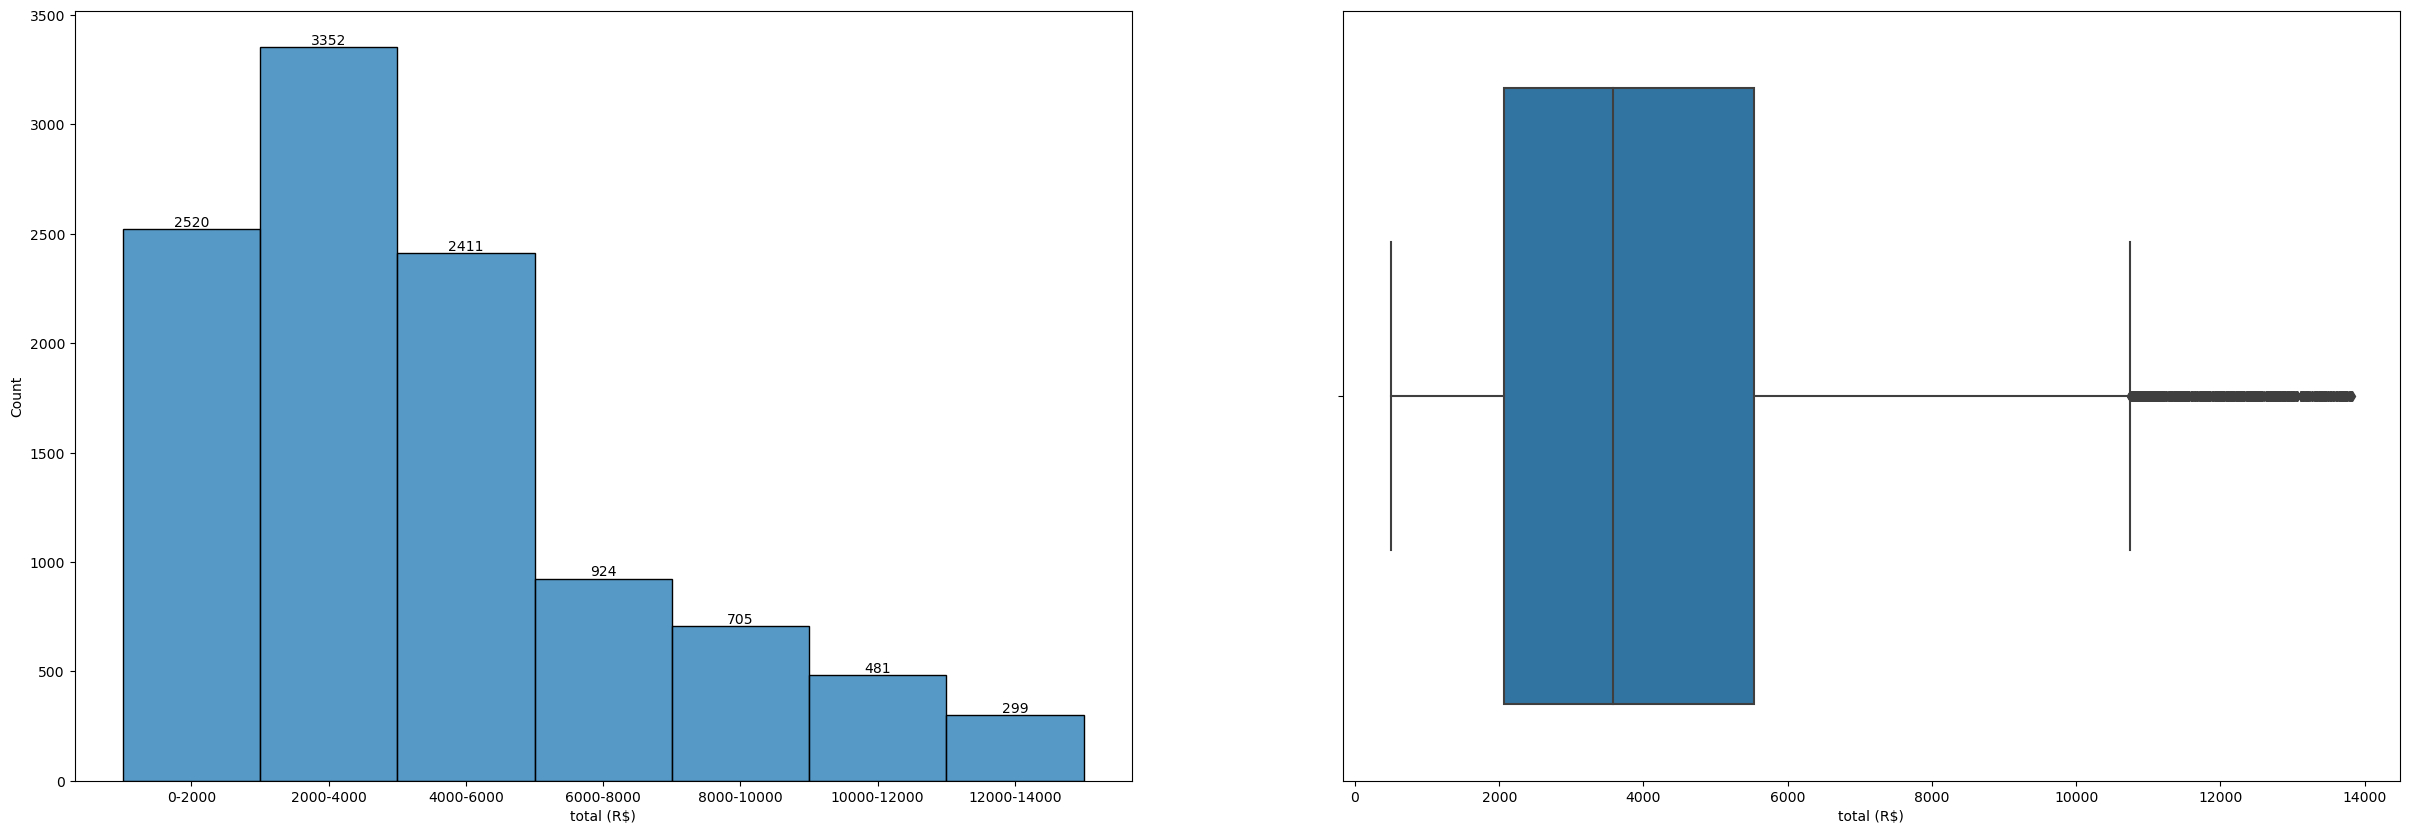

In [40]:
fig,ax=plt.subplots(1,2,figsize=(10,7))
bins=[0,2000,4000,6000,8000,10000,12000,14000]
labels=["0-2000","2000-4000","4000-6000","6000-8000","8000-10000","10000-12000","12000-14000"]
data=pd.cut(df['total (R$)'],bins=bins,labels=labels)
ax=sns.histplot(data=data,ax=ax[0])
for bar in ax.patches:
    count=bar.get_height()
    x = bar.get_x() + bar.get_width() /2                            
    y = bar.get_height()                                            
    ax.annotate(count, (x, y), va = "bottom", ha ="center" )   
    fig.set_figheight(10)                                                             
    fig.set_figwidth(30)


sns.boxplot(data=df,x='total (R$)')
    
plt.show()

In [41]:
data.value_counts()

2000-4000      3352
0-2000         2520
4000-6000      2411
6000-8000       924
8000-10000      705
10000-12000     481
12000-14000     299
Name: total (R$), dtype: int64

### ***Interpretation : There are 3352 rooms havig Total Rs in between 2000-4000

## $$\;\;\;\; Bivariate\ and \ Multivariate \ Analysis$$

In [43]:
#Outliers Treatment

categorical=['rooms', 'bathroom', 'parking spaces']
for col in categorical:
    mode=df[col].mode()[0]
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    LF=Q1-(1.5*IQR)
    UF=Q3+(1.5*IQR)
    
    for i in df[col]:
        if (i<LF) or (i>UF):
            df[col].replace(to_replace=i,value=mode,inplace=True)
        else:
            pass

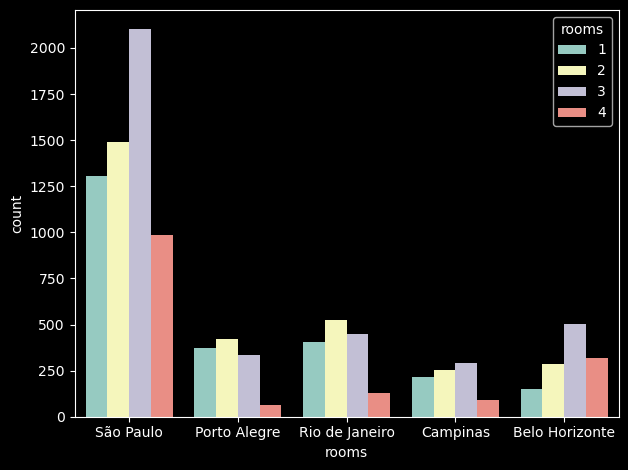

In [49]:
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})


sns.countplot(x=df['city'],hue=df['rooms'])
plt.xlabel('rooms')
plt.tight_layout()

In [58]:
df['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

### ***Interpretation : In São Paulo,Campinas and Belo Horizonte majority homes are with 3 rooms wherease in Porto Alegre,Rio de Janeiro majority two room flats are available

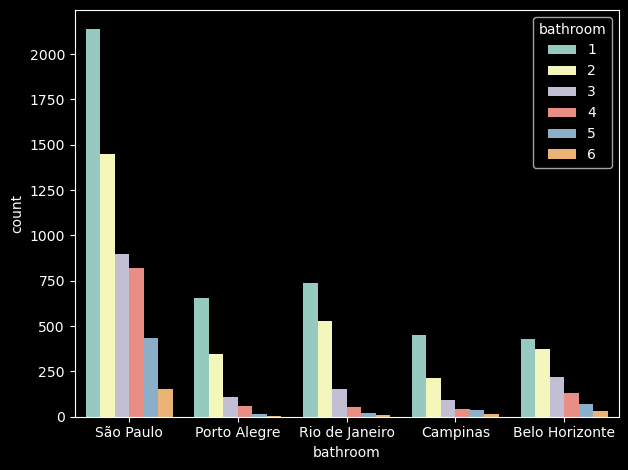

In [54]:
sns.countplot(x=df['city'],hue=df['bathroom'])
plt.xlabel('bathroom')
plt.tight_layout()

### ***Interpretation : In all cities majority of rooms have single bathroom.

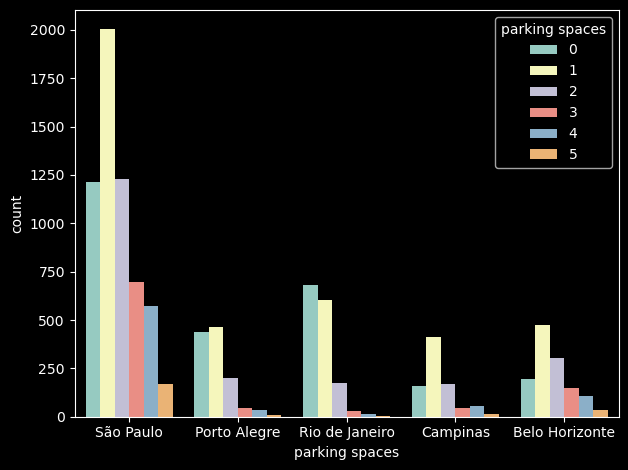

In [52]:
sns.countplot(x=df['city'],hue=df['parking spaces'])
plt.xlabel('parking spaces')
plt.tight_layout()

### ***Interpretation : All cities except Rio de Janeiro have 1 parking space for homes whereas in Rio de Janeiro most of homes dont have parking space

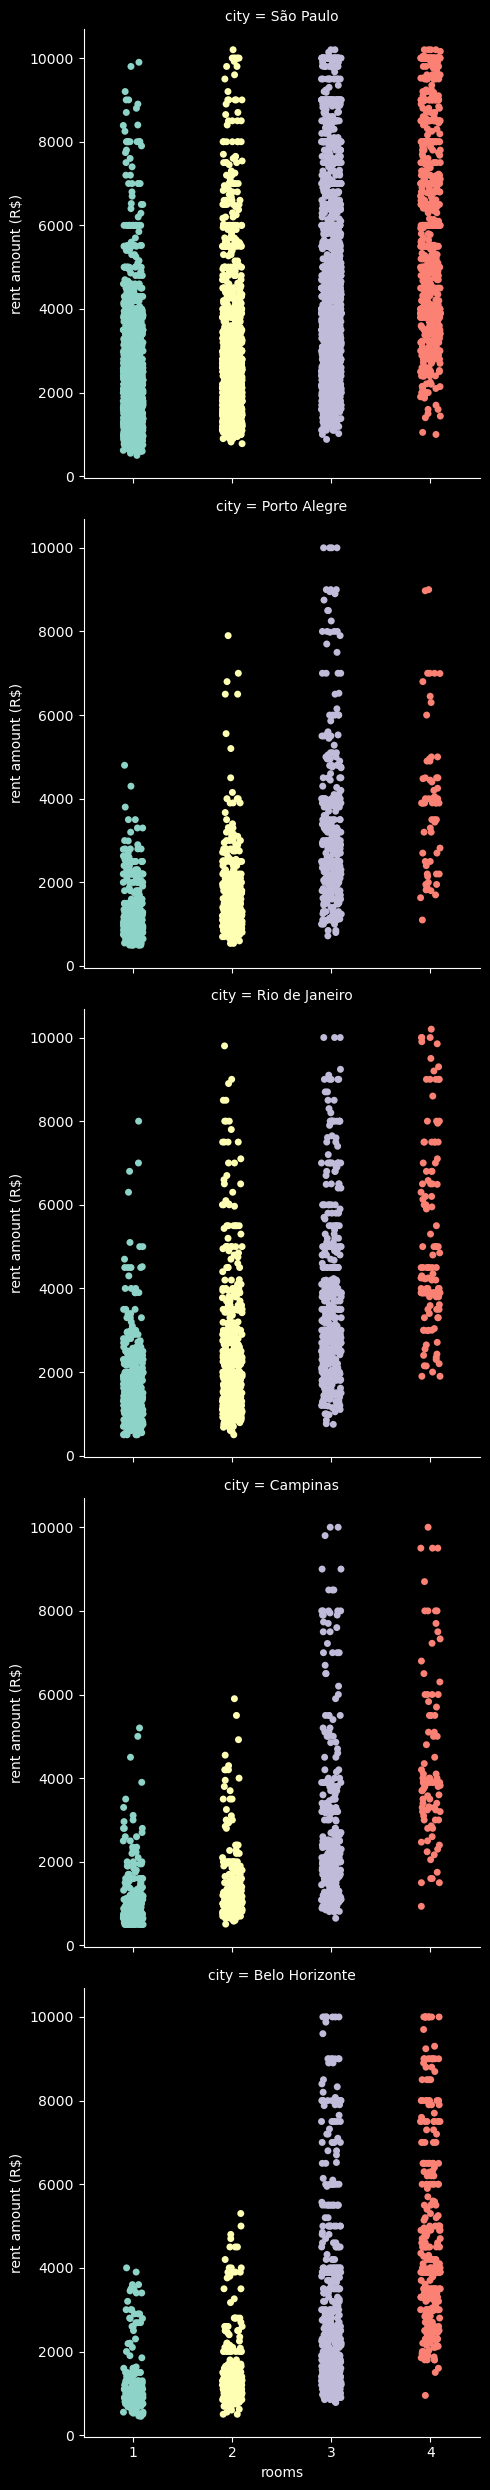

In [56]:
sns.catplot(data = df, x= 'rooms', y= 'rent amount (R$)', kind = 'strip' ,row='city' );

In [60]:
df.groupby('city')['rent amount (R$)'].mean()

city
Belo Horizonte    3013.238483
Campinas          2209.594030
Porto Alegre      2154.690639
Rio de Janeiro    2875.628809
São Paulo         3798.498259
Name: rent amount (R$), dtype: float64

### ***Interpretation :- Rent amount is higher for greater number of room flats and in the São Paulo mean rent is higher.